In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
adopcion = pd.read_csv("poblacion_adopcion_OK.csv")

In [3]:
adoptados= pd.read_csv("poblacion_adoptados_OK.csv")

In [4]:
centros = pd.read_excel("centros.xlsx")

COLUMNAS ADICIONALES:

**1.CENTROS**
- Capacidad
- Ocupacion
- id_centro

**2.ADOPCION**
- id_centro

**3.ADOPTADOS**
- id_centro

Ver las proporciones de perros, gatos y mixtas, ver las proporciones de los tamaños

## CONJUNTO CENTROS

#### AJUSTE DE CATEGORÍAS

Primero se van a ajustar las categorías de los centros en base al estudio affinity: 

22% Felina

21% Canina

57% Mixta

In [5]:
centros

,Nombre,Direccion,CCAA,Latitud,Longitud,Telefono,URL,Correo,Facebook,Categoria
0,HELPING ANIMALS ALMANZORA,"C/ HUELVA Nº 5 , Arboleas (ALMERIA) , Andalucí...",Andalucía,37.349970,-2.073728,+34877 393 789,http://www.helpinganimalsalmanzora.com,helpinga@reguera.com,register/helpinganimalsalmanzora,mixta
1,PROTECTORA DE ANIMALES ROCIANA ACOGE,"CL VENDIMIADORES 33 , Rociana del Condado (HUE...",Andalucía,37.312134,-6.595455,+34823 95 92 00,http://www.protectoradeanimalesrocianaacoge.com,prote@castaneda.net,author/protectoradeanimalesrocianaacoge,mixta
2,ABRAZO ANIMAL JAMILENA,"C/ MORERIA, 27 , Martos (JAEN) , Andalucía, Es...",Andalucía,37.724364,-3.968021,+34 943107598,http://www.abrazoanimaljamilena.com,abraz@valls-arrieta.es,index/abrazoanimaljamilena,mixta
3,ACTION FOR ANIMALS,"AVENIDA DE LA CONSTITUCION Nº 3 , Cómpeta (MAL...",Andalucía,36.833335,-3.976101,+34 855446257,http://www.actionforanimals.com,actio@aliaga-heredia.com,main/actionforanimals,mixta
4,ADA UMBRETE - DEFENSA ANIMAL,"C/ VOLUNTAD, Nº 2 , Umbrete (SEVILLA) , Andalu...",Andalucía,37.376780,-6.158583,+34982 217 289,http://www.adaumbretedefensaanimal.com,adaumbret@alcala.net,login/adaumbretedefensaanimal,mixta
...,...,...,...,...,...,...,...,...,...,...
946,CER MURCHANTE,"Calle Plana Meneses, Nº 25, MURCHANTE, España",Navarra,42.031125,-1.663485,+34 749031317,http://www.cermurchante.com,cermurcha@portero.es,search/cermurchante,mixta
947,KATZONDINA HUNTERS,"Calle Santa Agueda, nº 7, JAURRIETA, España",Navarra,42.886857,-1.137845,+34 703 86 89 90,http://www.katzondinahunters.com,katzondin@gras-jara.org,search/katzondinahunters,mixta
948,OBANOS BIZI,"Plaza de los Fueros, Nº 1, OBANOS, España",Navarra,42.679362,-1.785972,+34 926 48 89 83,http://www.obanosbizi.com,obanos@pujol-villalobos.es,main/obanosbizi,mixta
949,ACACONBAR,"Calle Auroros, 65, TUDELA, España",Navarra,42.063825,-1.620283,+34 922 581 454,http://www.acaconbar.com,acacon@elias.es,login/acaconbar,mixta


Comprobación del tanto por ciento que oucpa en la muestra actual las categorías de los centros:

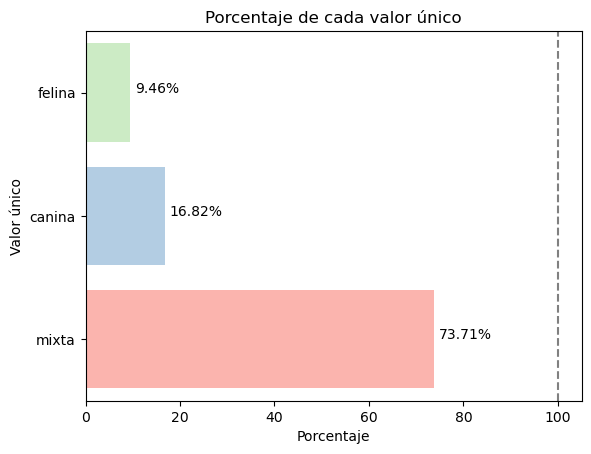

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar la columna a analizar
columna = centros['Categoria']

# Obtener los valores únicos y sus porcentajes
valores = columna.unique()
porcentajes = (columna.value_counts(normalize=True) * 100).round(2)

# Crear la figura y el gráfico de barras horizontal
fig, ax = plt.subplots()
barras = ax.barh(valores, porcentajes, color=plt.cm.Pastel1(range(len(valores))))

# Agregar etiquetas a las barras con los valores numéricos exactos
for i, v in enumerate(porcentajes):
    ax.text(v + 1, i, str(v) + '%', color='black', fontsize=10)

# Establecer los límites del eje y
ax.set_ylim(-0.5, len(valores) - 0.5)

# Agregar una línea vertical para el 100%
ax.axvline(x=100, color='gray', linestyle='--')

# Agregar un título y etiquetas a los ejes
ax.set_title('Porcentaje de cada valor único')
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Valor único')

# Mostrar la gráfica
plt.show()


In [7]:
# Seleccionar la columna a analizar
lista = centros['Categoria']

In [8]:
# Porcentajes dados
porcentaje_canina = 21
porcentaje_felina = 22

# Contadores para los elementos de cada tipo
contador_canina = 0
contador_felina = 0

# Iterar sobre la lista y contar los elementos de cada tipo
for elemento in lista:
    if elemento == "canina":
        contador_canina += 1
    elif elemento == "felina":
        contador_felina += 1

# Calcular cuántos elementos deben ser reemplazados por "canina" o "felina"
total_elementos = len(lista)
objetivo_canina = int(total_elementos * porcentaje_canina / 100)
objetivo_felina = int(total_elementos * porcentaje_felina / 100)
elementos_a_reemplazar_canina = objetivo_canina - contador_canina
elementos_a_reemplazar_felina = objetivo_felina - contador_felina

# Reemplazar elementos aleatoriamente hasta alcanzar los objetivos
while elementos_a_reemplazar_canina > 0 or elementos_a_reemplazar_felina > 0:
    indice = random.randrange(len(lista))
    elemento = lista[indice]
    if elemento == "mixta":
        if elementos_a_reemplazar_canina > 0:
            lista[indice] = "canina"
            elementos_a_reemplazar_canina -= 1
        elif elementos_a_reemplazar_felina > 0:
            lista[indice] = "felina"
            elementos_a_reemplazar_felina -= 1

# Imprimir la lista resultante
print(lista)


0       mixta
1       mixta
2       mixta
3      felina
4       mixta
        ...  
946     mixta
947     mixta
948     mixta
949     mixta
950     mixta
Name: Categoria, Length: 951, dtype: object


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5524\2377854023.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[indice] = "canina"
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5524\2377854023.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[indice] = "felina"


In [9]:
# PORCENTAJES FINALES

total_filas = len(lista)

conteo_f0 = lista.value_counts()['felina']
porc_f0 = conteo_f0 / total_filas * 100

conteo_c0 = lista.value_counts()['canina']
porc_c0 = conteo_c0 / total_filas * 100

conteo_m0 = lista.value_counts()['mixta']
porc_m0 = conteo_m0 / total_filas * 100

In [10]:
porc_f0

21.976866456361723

In [11]:
porc_c0

20.92534174553102

In [12]:
porc_m0

57.09779179810725

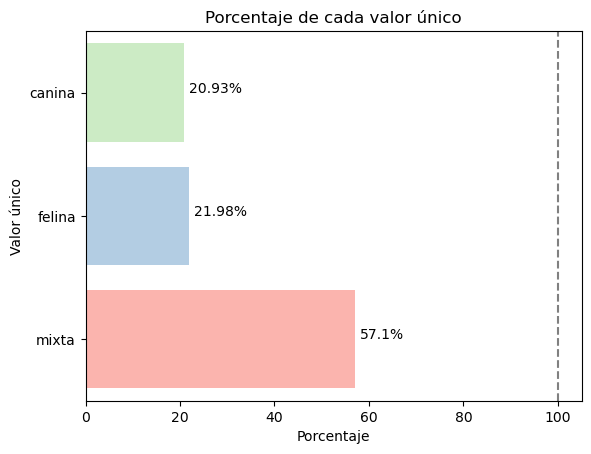

In [13]:
# Seleccionar la columna a analizar
columna = centros['Categoria']

# Obtener los valores únicos y sus porcentajes
valores = lista.unique()
porcentajes = (lista.value_counts(normalize=True) * 100).round(2)

# Crear la figura y el gráfico de barras horizontal
fig, ax = plt.subplots()
barras = ax.barh(valores, porcentajes, color=plt.cm.Pastel1(range(len(valores))))

# Agregar etiquetas a las barras con los valores numéricos exactos
for i, v in enumerate(porcentajes):
    ax.text(v + 1, i, str(v) + '%', color='black', fontsize=10)

# Establecer los límites del eje y
ax.set_ylim(-0.5, len(valores) - 0.5)

# Agregar una línea vertical para el 100%
ax.axvline(x=100, color='gray', linestyle='--')

# Agregar un título y etiquetas a los ejes
ax.set_title('Porcentaje de cada valor único')
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Valor único')

# Mostrar la gráfica
plt.show()

Cambio la columna de categoria por la lista nueva

In [14]:
centros['Categoria']= lista

In [15]:
centros

,Nombre,Direccion,CCAA,Latitud,Longitud,Telefono,URL,Correo,Facebook,Categoria
0,HELPING ANIMALS ALMANZORA,"C/ HUELVA Nº 5 , Arboleas (ALMERIA) , Andalucí...",Andalucía,37.349970,-2.073728,+34877 393 789,http://www.helpinganimalsalmanzora.com,helpinga@reguera.com,register/helpinganimalsalmanzora,mixta
1,PROTECTORA DE ANIMALES ROCIANA ACOGE,"CL VENDIMIADORES 33 , Rociana del Condado (HUE...",Andalucía,37.312134,-6.595455,+34823 95 92 00,http://www.protectoradeanimalesrocianaacoge.com,prote@castaneda.net,author/protectoradeanimalesrocianaacoge,mixta
2,ABRAZO ANIMAL JAMILENA,"C/ MORERIA, 27 , Martos (JAEN) , Andalucía, Es...",Andalucía,37.724364,-3.968021,+34 943107598,http://www.abrazoanimaljamilena.com,abraz@valls-arrieta.es,index/abrazoanimaljamilena,mixta
3,ACTION FOR ANIMALS,"AVENIDA DE LA CONSTITUCION Nº 3 , Cómpeta (MAL...",Andalucía,36.833335,-3.976101,+34 855446257,http://www.actionforanimals.com,actio@aliaga-heredia.com,main/actionforanimals,felina
4,ADA UMBRETE - DEFENSA ANIMAL,"C/ VOLUNTAD, Nº 2 , Umbrete (SEVILLA) , Andalu...",Andalucía,37.376780,-6.158583,+34982 217 289,http://www.adaumbretedefensaanimal.com,adaumbret@alcala.net,login/adaumbretedefensaanimal,mixta
...,...,...,...,...,...,...,...,...,...,...
946,CER MURCHANTE,"Calle Plana Meneses, Nº 25, MURCHANTE, España",Navarra,42.031125,-1.663485,+34 749031317,http://www.cermurchante.com,cermurcha@portero.es,search/cermurchante,mixta
947,KATZONDINA HUNTERS,"Calle Santa Agueda, nº 7, JAURRIETA, España",Navarra,42.886857,-1.137845,+34 703 86 89 90,http://www.katzondinahunters.com,katzondin@gras-jara.org,search/katzondinahunters,mixta
948,OBANOS BIZI,"Plaza de los Fueros, Nº 1, OBANOS, España",Navarra,42.679362,-1.785972,+34 926 48 89 83,http://www.obanosbizi.com,obanos@pujol-villalobos.es,main/obanosbizi,mixta
949,ACACONBAR,"Calle Auroros, 65, TUDELA, España",Navarra,42.063825,-1.620283,+34 922 581 454,http://www.acaconbar.com,acacon@elias.es,login/acaconbar,mixta


In [16]:
centros['Categoria'].value_counts()['felina']

209

In [17]:
centros['Categoria'].value_counts()['canina']

199

In [18]:
centros['Categoria'].value_counts()['mixta']

543

In [19]:
centros['Categoria'].isnull().sum()

0

Compruebo los porcentajes

In [20]:
total = len(centros['Categoria'])
total

951

In [21]:
centros['Categoria'].value_counts()['felina'] / total* 100

21.976866456361723

In [22]:
centros['Categoria'].value_counts()['canina'] / total* 100

20.92534174553102

In [23]:
centros['Categoria'].value_counts()['mixta'] / total* 100

57.09779179810725

In [24]:
centros['Categoria']

0       mixta
1       mixta
2       mixta
3      felina
4       mixta
        ...  
946     mixta
947     mixta
948     mixta
949     mixta
950     mixta
Name: Categoria, Length: 951, dtype: object

#### AJUSTE DE TAMAÑO

Ahora tengo que hacer una columna de tamaño del centro en base a los siguientes porcentajes:

**Gatos**

63% pequeñas 

19% medianas 

18% grandes 

**Perros**

49% pequeña

23% mediana 

28% grande

In [25]:
centros['Tamaño']= ''

In [26]:
# Definir las probabilidades de cada categoría de ocupación
probabilidades = np.array([0.63, 0.19, 0.18])

# Generar valores aleatorios de la columna "Ocupacion" solo para las filas con la categoría "felina"
centro_felino = centros['Categoria'] == 'felina'
ocupacion_aleatoria = np.random.choice(['pequeña', 'mediana', 'grande'], p=probabilidades, size=sum(centro_felino))
centros.loc[centro_felino, 'Tamaño'] = ocupacion_aleatoria

In [27]:
# Definir las probabilidades de cada categoría de ocupación
probabilidades = np.array([0.49, 0.23, 0.28])

# Generar valores aleatorios de la columna "Ocupacion" solo para las filas con la categoría "felina"
centro_canino = centros['Categoria'] == 'canina'
ocupacion_aleatoria = np.random.choice(['pequeña', 'mediana', 'grande'], p=probabilidades, size=sum(centro_canino))
centros.loc[centro_canino, 'Tamaño'] = ocupacion_aleatoria

In [28]:
centro_mixto = centros['Categoria'] == 'mixta'
num_filas_mixtas = sum(centro_mixto)
ocupacion_aleatoria = np.random.choice(['pequeña', 'mediana', 'grande'], size=num_filas_mixtas)
centros.loc[centro_mixto, 'Tamaño'] = ocupacion_aleatoria

In [29]:
# controlo que no haya nulos
centros['Tamaño'].isnull().sum()

0

In [30]:
# controlo que no haya str vacíos de tipo ''
valores_vacios = centros['Tamaño'].str.len() == 0
if valores_vacios.any():
    print(f'Hay {valores_vacios.sum()} valores vacíos en la columna "Tamaño"')
else:
    print('No hay valores vacíos en la columna "Tamaño"')

No hay valores vacíos en la columna "Tamaño"


In [31]:
centros['Tamaño']

0      mediana
1      mediana
2      mediana
3      pequeña
4       grande
        ...   
946    mediana
947    mediana
948    pequeña
949    mediana
950     grande
Name: Tamaño, Length: 951, dtype: object

#### AJUSTE DE CAPACIDAD

Ahora a partir del tamaño, saco valores aleatorios de enteros para la capacidad

In [32]:
centros['Capaciadad'] =''

In [33]:
# Función para generar valores aleatorios según el "Tamaño"
def capacidad_aleatoria(tamaño):
    if tamaño == 'pequeña':
        return random.randint(20, 100)
    elif tamaño == 'mediana':
        return random.randint(100, 300)
    elif tamaño == 'grande':
        return random.randint(300, 500)

In [34]:
centros['Capacidad'] = centros['Tamaño'].apply(capacidad_aleatoria)

In [35]:
centros['Capaciadad'].isnull().sum()

0

#### AJUSTE OCUPACION

Genero la ocupación a partir de la columna de Capacidad y con la condicion de que los valores luego sumen medio millón

In [36]:
# Función para generar valores aleatorios según la "Capacidad"
def ocupacion_aleatoria(capacidad):
    rango = round(capacidad * 0.75)
    valor_minimo = capacidad - rango
    valor_maximo = capacidad + rango
    return random.randint(valor_minimo, valor_maximo)

In [37]:
centros['Ocupacion'] = centros['Capacidad'].apply(ocupacion_aleatoria)

In [38]:
centros['Ocupacion'].isnull().sum()

0

In [39]:
# Escalar los valores de la columna "Ocupacion" 
# para que la suma total sea igual a 200,000

suma_actual = centros['Ocupacion'].sum()
factor_escalado = 200000 / suma_actual
centros['Ocupacion'] = centros['Ocupacion'].apply(lambda x: round(x * factor_escalado))

In [40]:
centros

,Nombre,Direccion,CCAA,Latitud,Longitud,Telefono,URL,Correo,Facebook,Categoria,Tamaño,Capaciadad,Capacidad,Ocupacion
0,HELPING ANIMALS ALMANZORA,"C/ HUELVA Nº 5 , Arboleas (ALMERIA) , Andalucí...",Andalucía,37.349970,-2.073728,+34877 393 789,http://www.helpinganimalsalmanzora.com,helpinga@reguera.com,register/helpinganimalsalmanzora,mixta,mediana,,253,252
1,PROTECTORA DE ANIMALES ROCIANA ACOGE,"CL VENDIMIADORES 33 , Rociana del Condado (HUE...",Andalucía,37.312134,-6.595455,+34823 95 92 00,http://www.protectoradeanimalesrocianaacoge.com,prote@castaneda.net,author/protectoradeanimalesrocianaacoge,mixta,mediana,,151,104
2,ABRAZO ANIMAL JAMILENA,"C/ MORERIA, 27 , Martos (JAEN) , Andalucía, Es...",Andalucía,37.724364,-3.968021,+34 943107598,http://www.abrazoanimaljamilena.com,abraz@valls-arrieta.es,index/abrazoanimaljamilena,mixta,mediana,,207,214
3,ACTION FOR ANIMALS,"AVENIDA DE LA CONSTITUCION Nº 3 , Cómpeta (MAL...",Andalucía,36.833335,-3.976101,+34 855446257,http://www.actionforanimals.com,actio@aliaga-heredia.com,main/actionforanimals,felina,pequeña,,94,167
4,ADA UMBRETE - DEFENSA ANIMAL,"C/ VOLUNTAD, Nº 2 , Umbrete (SEVILLA) , Andalu...",Andalucía,37.376780,-6.158583,+34982 217 289,http://www.adaumbretedefensaanimal.com,adaumbret@alcala.net,login/adaumbretedefensaanimal,mixta,grande,,434,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,CER MURCHANTE,"Calle Plana Meneses, Nº 25, MURCHANTE, España",Navarra,42.031125,-1.663485,+34 749031317,http://www.cermurchante.com,cermurcha@portero.es,search/cermurchante,mixta,mediana,,232,66
947,KATZONDINA HUNTERS,"Calle Santa Agueda, nº 7, JAURRIETA, España",Navarra,42.886857,-1.137845,+34 703 86 89 90,http://www.katzondinahunters.com,katzondin@gras-jara.org,search/katzondinahunters,mixta,mediana,,134,66
948,OBANOS BIZI,"Plaza de los Fueros, Nº 1, OBANOS, España",Navarra,42.679362,-1.785972,+34 926 48 89 83,http://www.obanosbizi.com,obanos@pujol-villalobos.es,main/obanosbizi,mixta,pequeña,,75,56
949,ACACONBAR,"Calle Auroros, 65, TUDELA, España",Navarra,42.063825,-1.620283,+34 922 581 454,http://www.acaconbar.com,acacon@elias.es,login/acaconbar,mixta,mediana,,196,146


#### CREAR COLUMNA id_centro

In [41]:
centros['id_centro'] = (centros.index + 1).astype(str).str.zfill(6)

In [42]:
centros

,Nombre,Direccion,CCAA,Latitud,Longitud,Telefono,URL,Correo,Facebook,Categoria,Tamaño,Capaciadad,Capacidad,Ocupacion,id_centro
0,HELPING ANIMALS ALMANZORA,"C/ HUELVA Nº 5 , Arboleas (ALMERIA) , Andalucí...",Andalucía,37.349970,-2.073728,+34877 393 789,http://www.helpinganimalsalmanzora.com,helpinga@reguera.com,register/helpinganimalsalmanzora,mixta,mediana,,253,252,000001
1,PROTECTORA DE ANIMALES ROCIANA ACOGE,"CL VENDIMIADORES 33 , Rociana del Condado (HUE...",Andalucía,37.312134,-6.595455,+34823 95 92 00,http://www.protectoradeanimalesrocianaacoge.com,prote@castaneda.net,author/protectoradeanimalesrocianaacoge,mixta,mediana,,151,104,000002
2,ABRAZO ANIMAL JAMILENA,"C/ MORERIA, 27 , Martos (JAEN) , Andalucía, Es...",Andalucía,37.724364,-3.968021,+34 943107598,http://www.abrazoanimaljamilena.com,abraz@valls-arrieta.es,index/abrazoanimaljamilena,mixta,mediana,,207,214,000003
3,ACTION FOR ANIMALS,"AVENIDA DE LA CONSTITUCION Nº 3 , Cómpeta (MAL...",Andalucía,36.833335,-3.976101,+34 855446257,http://www.actionforanimals.com,actio@aliaga-heredia.com,main/actionforanimals,felina,pequeña,,94,167,000004
4,ADA UMBRETE - DEFENSA ANIMAL,"C/ VOLUNTAD, Nº 2 , Umbrete (SEVILLA) , Andalu...",Andalucía,37.376780,-6.158583,+34982 217 289,http://www.adaumbretedefensaanimal.com,adaumbret@alcala.net,login/adaumbretedefensaanimal,mixta,grande,,434,396,000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,CER MURCHANTE,"Calle Plana Meneses, Nº 25, MURCHANTE, España",Navarra,42.031125,-1.663485,+34 749031317,http://www.cermurchante.com,cermurcha@portero.es,search/cermurchante,mixta,mediana,,232,66,000947
947,KATZONDINA HUNTERS,"Calle Santa Agueda, nº 7, JAURRIETA, España",Navarra,42.886857,-1.137845,+34 703 86 89 90,http://www.katzondinahunters.com,katzondin@gras-jara.org,search/katzondinahunters,mixta,mediana,,134,66,000948
948,OBANOS BIZI,"Plaza de los Fueros, Nº 1, OBANOS, España",Navarra,42.679362,-1.785972,+34 926 48 89 83,http://www.obanosbizi.com,obanos@pujol-villalobos.es,main/obanosbizi,mixta,pequeña,,75,56,000949
949,ACACONBAR,"Calle Auroros, 65, TUDELA, España",Navarra,42.063825,-1.620283,+34 922 581 454,http://www.acaconbar.com,acacon@elias.es,login/acaconbar,mixta,mediana,,196,146,000950


## CONJUNTO ADOPCION

In [43]:
adopcion

,Nombre,Sexo,Raza,Edad,Tamaño,Especie,id_adopcion,cat_abandonado,cat_cariño,cat_abuelo,...,cat_independencia,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma
0,Andrés,Macho,Bodeguero,4 años,Mediano,Canina,1,0.083918,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
1,Hortensia,Hembra,Mestizo,1 años,Mediano,Canina,2,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052836,0.000000,0.000000,-0.073742,0.0,0.0,1.0
2,Angélica,Hembra,Pastor Belga,2 años,Mediano,Canina,3,0.000000,0.000000,0.135819,...,0.000000,0.000000,0.000000,0.307135,0.000000,0.000000,0.000000,0.0,0.0,1.0
3,Hilario,Macho,Mastín,10 años,Mediano,Canina,4,0.050932,0.000000,0.175044,...,0.000000,0.000000,0.073939,0.065000,0.000000,0.000000,0.000000,0.0,0.0,1.0
4,Jose luis,Macho,Podenco,12 años,Mediano,Canina,5,0.000000,0.224509,0.000000,...,0.000000,0.000000,0.000000,0.113679,0.000000,0.000000,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Marcelo,Macho,Mestizo,Menos de 1 año,Mediano,Canina,499996,0.000000,0.055907,0.000000,...,0.047283,0.000000,0.000000,0.196178,0.000000,0.000000,0.000000,0.0,0.0,1.0
499996,Lautaro,Macho,Galgo,6 años,Mediano,Canina,499997,0.000000,0.038663,0.043939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
499997,Evita,Hembra,Cruce Pointer,1 años,Mediano,Canina,499998,0.463434,0.000000,0.000000,...,0.000000,0.051768,0.000000,-0.102972,0.059748,0.000000,0.022838,0.0,0.0,1.0
499998,Sebastián,Macho,Cruce Podenco,1 años,Mediano,Canina,499999,0.000000,0.053711,0.000000,...,0.000000,0.080343,-0.035020,0.000000,0.000000,0.021526,0.000000,0.0,0.0,1.0


En primer lugar recorto el número de registros porque es enorme para la tan poca cantidad de centros que tenemos, me voy a quedar con 200.000 registros (muestra aleatoria)

In [44]:
adopcion = adopcion.sample(n=200000)

In [48]:
len(adopcion)

200000

Ahora la ocupacion de animales de cada centro tiene que tener sentido con la cantidad de id de centro que ponga en los conjuntos de animales en adopcion

In [46]:
lista_centros = []
for _, centro in centros.iterrows():
    lista_centros += [centro['id_centro']] * centro['Ocupacion']

# Mezclar la lista aleatoriamente
np.random.shuffle(lista_centros)

In [49]:
# Asignar el id del centro a cada registro de animales
adopcion['id_centro'] = [lista_centros[i % len(lista_centros)] for i in range(len(adopcion))]

In [50]:
adopcion

,Nombre,Sexo,Raza,Edad,Tamaño,Especie,id_adopcion,cat_abandonado,cat_cariño,cat_abuelo,...,cat_maltrato,cat_gato,cat_perro,cat_pelo,cat_macho,cat_hembra,cat_ladra,cat_ruido,suma,id_centro
399950,Tomás,Macho,Pastor Belga,Menos de 1 año,Mediano,Canina,399951,0.000000,0.065953,0.111640,...,0.00000,0.000000,0.229896,0.00000,0.000000,0.000000,0.227081,0.00000,1.0,000543
313003,Carolina,Hembra,Mestizo,4 años,Mediano,Canina,313004,0.000000,0.022771,0.000000,...,0.00000,0.000000,-0.102187,0.00000,0.000000,0.000000,0.000000,0.00000,1.0,000118
467,Malvolio,Macho,Mestizo,5 años,Mediano,Canina,468,0.119279,0.073283,0.000000,...,0.00000,0.000000,-0.115225,0.08198,0.000000,0.000000,0.045177,0.00000,1.0,000757
2892,Gabriela,Hembra,Mestizo,8 años,Mediano,Canina,2893,0.000000,0.126649,0.033483,...,0.00000,-0.044153,-0.070310,0.00000,0.000000,0.000000,0.000000,0.00000,1.0,000609
52356,Citlali,Hembra,Podenco,5 años,Mediano,Canina,52357,0.000000,0.000000,0.000000,...,0.00000,0.000000,-0.061876,0.00000,0.000000,0.000000,0.000000,0.00000,1.0,000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412399,Magdalena,Hembra,Bretón Español,Menos de 1 año,Mediano,Canina,412400,0.000000,0.076851,0.135845,...,0.00000,0.000000,-0.144650,0.00000,0.018501,0.000000,0.000000,0.07082,1.0,000210
184383,Clotilde,Hembra,Podenco,1 años,Mediano,Canina,184384,0.238415,0.130024,0.033959,...,0.04552,0.000000,-0.066421,0.00000,0.000000,0.000000,0.000000,0.00000,1.0,000618
206614,Dolores,Hembra,Podenco,6 años,Mediano,Canina,206615,0.056197,0.019332,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.0,000241
430621,Mayte,Hembra,Mestizo,1 años,Mediano,Canina,430622,0.156326,0.000000,0.000000,...,0.00000,0.000000,0.057200,0.00000,0.000000,-0.050001,0.000000,0.00000,1.0,000935


## CONJUNTO ADOPTADOS

In [51]:
adoptados

,id_animal,id_centro,Raza,Especie,Sexo,Tamaño,Microchip,Tiempo,Edad
0,1,NaN,Mestizo,Canina,Hembra,Mediano,False,0 año y 3 meses,3 años y 1 mes
1,2,NaN,Mestizo,Canina,Macho,Pequeño,True,0 año y 2 meses,3 años y 7 meses
2,3,NaN,Mestizo,Canina,Hembra,Pequeño,True,0 año y 0 mes,11 años y 6 meses
3,4,NaN,Pastor Belga,Canina,Hembra,Mediano,False,0 año y 4 meses,1 año y 0 mes
4,5,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,3 años y 10 meses
...,...,...,...,...,...,...,...,...,...
499995,499996,NaN,Mestizo,Canina,Macho,Mediano,True,0 año y 0 mes,9 años y 2 meses
499996,499997,NaN,Mestizo,Canina,Hembra,Mediano,True,1 año y 3 meses,2 años y 7 meses
499997,499998,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,9 años y 9 meses
499998,499999,NaN,Mestizo,Canina,Macho,Mediano,True,1 año y 6 meses,10 años y 10 meses


In [52]:
adoptados['id_centro'] = [lista_centros[i % len(lista_centros)] for i in range(len(adoptados))]

In [53]:
adoptados

,id_animal,id_centro,Raza,Especie,Sexo,Tamaño,Microchip,Tiempo,Edad
0,1,000543,Mestizo,Canina,Hembra,Mediano,False,0 año y 3 meses,3 años y 1 mes
1,2,000118,Mestizo,Canina,Macho,Pequeño,True,0 año y 2 meses,3 años y 7 meses
2,3,000757,Mestizo,Canina,Hembra,Pequeño,True,0 año y 0 mes,11 años y 6 meses
3,4,000609,Pastor Belga,Canina,Hembra,Mediano,False,0 año y 4 meses,1 año y 0 mes
4,5,000743,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,3 años y 10 meses
...,...,...,...,...,...,...,...,...,...
499995,499996,000756,Mestizo,Canina,Macho,Mediano,True,0 año y 0 mes,9 años y 2 meses
499996,499997,000156,Mestizo,Canina,Hembra,Mediano,True,1 año y 3 meses,2 años y 7 meses
499997,499998,000132,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,9 años y 9 meses
499998,499999,000826,Mestizo,Canina,Macho,Mediano,True,1 año y 6 meses,10 años y 10 meses


#### GUARDAR LOS DF

In [54]:
centros.to_csv('poblacion_centros_v2.csv', index=False)

In [55]:
adopcion.to_csv('poblacion_adopcion_v2.csv', index=False)

In [56]:
adoptados.to_csv('poblacion_adoptados_v2.csv', index=False)

In [2]:
adopcion1= pd.read_csv("poblacion_adopcion_v2.csv")

In [3]:
adoptados1= pd.read_csv("poblacion_adoptados_v2.csv")

In [4]:
centros1= pd.read_csv("poblacion_centros_v2.csv")

In [5]:
adopcion1.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Especie', 'id_adopcion',
       'cat_abandonado', 'cat_cariño', 'cat_abuelo', 'cat_cercania',
       'cat_acogida', 'cat_actividad', 'cat_dependencia', 'cat_adaptacion',
       'cat_docil', 'cat_agradecido', 'cat_agresivo', 'cat_tenso',
       'cat_alegre', 'cat_inteligencia', 'cat_miedo', 'cat_convivencia',
       'cat_correa', 'cat_carretera', 'cat_aventura', 'cat_niños',
       'cat_belleza', 'cat_ppp', 'cat_bruto', 'cat_triste', 'cat_cachorro',
       'cat_tranquilidad', 'cat_desubicado', 'cat_recuperacion', 'cat_pequeño',
       'cat_grande', 'cat_cronico', 'cat_historial', 'cat_fortaleza',
       'cat_independencia', 'cat_maltrato', 'cat_gato', 'cat_perro',
       'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra', 'cat_ruido', 'suma',
       'id_centro'],
      dtype='object')

# SELECCIÓN DEFINITIVA DE COLUMNAS

In [6]:
col_adop= ['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Especie', 'id_adopcion',
       'cat_abandonado', 'cat_cariño', 'cat_abuelo', 'cat_cercania',
       'cat_acogida', 'cat_actividad', 'cat_dependencia', 'cat_adaptacion',
       'cat_docil', 'cat_agradecido', 'cat_agresivo', 'cat_tenso',
       'cat_alegre', 'cat_inteligencia', 'cat_miedo', 'cat_convivencia',
       'cat_correa', 'cat_carretera', 'cat_aventura', 'cat_niños',
       'cat_belleza', 'cat_ppp', 'cat_bruto', 'cat_triste', 
       'cat_tranquilidad', 'cat_desubicado', 'cat_recuperacion', 
        'cat_cronico', 'cat_historial', 'cat_fortaleza',
       'cat_independencia', 'cat_maltrato', 'cat_gato', 'cat_perro',
       'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra', 'cat_ruido','id_centro']

In [7]:
adopcion2 = adopcion1.loc[:, col_adop]

In [8]:
adopcion2.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Especie', 'id_adopcion',
       'cat_abandonado', 'cat_cariño', 'cat_abuelo', 'cat_cercania',
       'cat_acogida', 'cat_actividad', 'cat_dependencia', 'cat_adaptacion',
       'cat_docil', 'cat_agradecido', 'cat_agresivo', 'cat_tenso',
       'cat_alegre', 'cat_inteligencia', 'cat_miedo', 'cat_convivencia',
       'cat_correa', 'cat_carretera', 'cat_aventura', 'cat_niños',
       'cat_belleza', 'cat_ppp', 'cat_bruto', 'cat_triste', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_cronico', 'cat_historial',
       'cat_fortaleza', 'cat_independencia', 'cat_maltrato', 'cat_gato',
       'cat_perro', 'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra',
       'cat_ruido', 'id_centro'],
      dtype='object')

In [18]:
col_adop2= ['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Especie', 'id_adopcion',
       'cat_abandonado', 'cat_cariño',  'cat_cercania',
       'cat_acogida', 'cat_actividad', 'cat_dependencia', 'cat_adaptacion',
       'cat_docil', 'cat_agradecido', 'cat_agresivo', 'cat_tenso',
       'cat_alegre', 'cat_inteligencia', 'cat_miedo', 'cat_convivencia',
       'cat_correa', 'cat_carretera', 'cat_aventura', 'cat_niños',
       'cat_belleza', 'cat_ppp', 'cat_bruto', 'cat_triste', 'cat_tranquilidad',
       'cat_desubicado', 'cat_recuperacion', 'cat_cronico', 'cat_historial',
       'cat_fortaleza', 'cat_independencia', 'cat_maltrato', 'cat_gato',
       'cat_perro', 'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra',
       'cat_ruido', 'id_centro']

In [19]:
adopcion3 = adopcion2.loc[:, col_adop2]

In [21]:
adopcion3.columns

Index(['Nombre', 'Sexo', 'Raza', 'Edad', 'Tamaño', 'Especie', 'id_adopcion',
       'cat_abandonado', 'cat_cariño', 'cat_cercania', 'cat_acogida',
       'cat_actividad', 'cat_dependencia', 'cat_adaptacion', 'cat_docil',
       'cat_agradecido', 'cat_agresivo', 'cat_tenso', 'cat_alegre',
       'cat_inteligencia', 'cat_miedo', 'cat_convivencia', 'cat_correa',
       'cat_carretera', 'cat_aventura', 'cat_niños', 'cat_belleza', 'cat_ppp',
       'cat_bruto', 'cat_triste', 'cat_tranquilidad', 'cat_desubicado',
       'cat_recuperacion', 'cat_cronico', 'cat_historial', 'cat_fortaleza',
       'cat_independencia', 'cat_maltrato', 'cat_gato', 'cat_perro',
       'cat_pelo', 'cat_macho', 'cat_hembra', 'cat_ladra', 'cat_ruido',
       'id_centro'],
      dtype='object')

In [9]:
adoptados1.columns

Index(['id_animal', 'id_centro', 'Raza', 'Especie', 'Sexo', 'Tamaño',
       'Microchip', 'Tiempo', 'Edad'],
      dtype='object')

In [10]:
centros1.columns

Index(['Nombre', 'Direccion', 'CCAA', 'Latitud', 'Longitud', 'Telefono', 'URL',
       'Correo', 'Facebook', 'Categoria', 'Tamaño', 'Capaciadad', 'Capacidad',
       'Ocupacion', 'id_centro'],
      dtype='object')

In [11]:
centros1

,Nombre,Direccion,CCAA,Latitud,Longitud,Telefono,URL,Correo,Facebook,Categoria,Tamaño,Capaciadad,Capacidad,Ocupacion,id_centro
0,HELPING ANIMALS ALMANZORA,"C/ HUELVA Nº 5 , Arboleas (ALMERIA) , Andalucí...",Andalucía,37.349970,-2.073728,+34877 393 789,http://www.helpinganimalsalmanzora.com,helpinga@reguera.com,register/helpinganimalsalmanzora,mixta,mediana,NaN,253,252,1
1,PROTECTORA DE ANIMALES ROCIANA ACOGE,"CL VENDIMIADORES 33 , Rociana del Condado (HUE...",Andalucía,37.312134,-6.595455,+34823 95 92 00,http://www.protectoradeanimalesrocianaacoge.com,prote@castaneda.net,author/protectoradeanimalesrocianaacoge,mixta,mediana,NaN,151,104,2
2,ABRAZO ANIMAL JAMILENA,"C/ MORERIA, 27 , Martos (JAEN) , Andalucía, Es...",Andalucía,37.724364,-3.968021,+34 943107598,http://www.abrazoanimaljamilena.com,abraz@valls-arrieta.es,index/abrazoanimaljamilena,mixta,mediana,NaN,207,214,3
3,ACTION FOR ANIMALS,"AVENIDA DE LA CONSTITUCION Nº 3 , Cómpeta (MAL...",Andalucía,36.833335,-3.976101,+34 855446257,http://www.actionforanimals.com,actio@aliaga-heredia.com,main/actionforanimals,felina,pequeña,NaN,94,167,4
4,ADA UMBRETE - DEFENSA ANIMAL,"C/ VOLUNTAD, Nº 2 , Umbrete (SEVILLA) , Andalu...",Andalucía,37.376780,-6.158583,+34982 217 289,http://www.adaumbretedefensaanimal.com,adaumbret@alcala.net,login/adaumbretedefensaanimal,mixta,grande,NaN,434,396,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,CER MURCHANTE,"Calle Plana Meneses, Nº 25, MURCHANTE, España",Navarra,42.031125,-1.663485,+34 749031317,http://www.cermurchante.com,cermurcha@portero.es,search/cermurchante,mixta,mediana,NaN,232,66,947
947,KATZONDINA HUNTERS,"Calle Santa Agueda, nº 7, JAURRIETA, España",Navarra,42.886857,-1.137845,+34 703 86 89 90,http://www.katzondinahunters.com,katzondin@gras-jara.org,search/katzondinahunters,mixta,mediana,NaN,134,66,948
948,OBANOS BIZI,"Plaza de los Fueros, Nº 1, OBANOS, España",Navarra,42.679362,-1.785972,+34 926 48 89 83,http://www.obanosbizi.com,obanos@pujol-villalobos.es,main/obanosbizi,mixta,pequeña,NaN,75,56,949
949,ACACONBAR,"Calle Auroros, 65, TUDELA, España",Navarra,42.063825,-1.620283,+34 922 581 454,http://www.acaconbar.com,acacon@elias.es,login/acaconbar,mixta,mediana,NaN,196,146,950


In [12]:
centros2= centros1.drop(centros1.columns[11], axis=1, inplace=True)

In [15]:
centros1.columns

Index(['Nombre', 'Direccion', 'CCAA', 'Latitud', 'Longitud', 'Telefono', 'URL',
       'Correo', 'Facebook', 'Categoria', 'Tamaño', 'Capacidad', 'Ocupacion',
       'id_centro'],
      dtype='object')

In [22]:
centros1.to_csv('poblacion_centros_v3.csv', index=False)

In [23]:
adoptados1.to_csv('poblacion_adoptados_v3.csv', index=False)

In [24]:
adopcion3.to_csv('poblacion_adopcion_v3.csv', index=False)